# Notebook used to help create:

- importing data src
- precprocessing data src

In [1]:
%pwd

'C:\\Users\\bjk1y13\\OneDrive - University of Southampton\\MH028_UHS_Weather\\4_Analysis\\EDclassification\\notebooks\\model'

In [2]:
import pandas as pd
import numpy as np
from src.data.io import import_pickled_feature_dfs, import_merge_prevday_target_column, import_merge_pickled_target_class

# Import data

In [3]:
features = import_pickled_feature_dfs('../../data/interim/D2_timeseries/', ['EDdaily.pkl', 'IPdaily.pkl','EDmorn.pkl', 'IPmorn.pkl' ,'callender.pkl'])

In [4]:
features.shape

(2465, 22)

In [5]:
features.tail()

,EDDAILYattendances,EDDAILYadmissions,EDDAILYage_mean,EDDAILYage_75plus,IPDAILYpatients_total,IPDAILYpatients_nonelec,IPDAILYpatients_elec,IPDAILYpatients_daycase,IPDAILYage_mean_elecnonelec,IPDAILYage_75plus_elecnonelec,...,EDMORNage_75plus,IPMORNIPMORNpatients_total,IPMORNIPMORNpatients_nonelec,IPMORNIPMORNpatients_elec,IPMORNIPMORNpatients_daycase,IPMORNIPMORNage_mean_elecnonelec,IPMORNIPMORNage_75plus_elecnonelec,year,month,dayofweek
,,,,,,,,,,,,,,,,,,,,,
2018-09-26,446,182,42.9126,62,2,1,1,0,35.5,0,...,10,2,1,1,0,35.5,0,2018,9,Wednesday
2018-09-27,487,188,44.7064,82,2,1,1,0,35.5,0,...,17,2,1,1,0,35.5,0,2018,9,Thursday
2018-09-28,482,168,44.1992,74,2,1,1,0,35.5,0,...,12,1,0,1,0,0,0,2018,9,Friday
2018-09-29,463,191,46.4989,84,1,0,1,0,0,0,...,7,1,0,1,0,0,0,2018,9,Saturday
2018-09-30,367,157,40.3597,47,1,0,1,0,0,0,...,7,1,0,1,0,0,0,2018,9,Sunday


In [6]:
target = pd.read_pickle('../../data/interim/EDooc_class.pkl')

In [7]:
features = target.merge(features, right_index=True, left_index=True)

Remember target does not need to be offset because features were calculated for the previous days records

In [8]:
features_final = features.copy()
# features_final['flag_target'] = features_final['flag_target'].shift(-1)
##### we do shift the EDocc col as this is for the current date in index.
features_final['EDocc'] = features_final['EDocc'].shift(1)

In [9]:
features_final.rename(columns={'EDocc':'TARGET_prevday'},inplace=True)

In [10]:
features_final['flag_target_prevday'] = features_final['flag_target'].shift(1)

In [11]:
features_final.flag_target.value_counts()

0    2094
1     371
Name: flag_target, dtype: int64

In [12]:
features_final.head()

,TARGET_prevday,flag_target,EDDAILYattendances,EDDAILYadmissions,EDDAILYage_mean,EDDAILYage_75plus,IPDAILYpatients_total,IPDAILYpatients_nonelec,IPDAILYpatients_elec,IPDAILYpatients_daycase,...,IPMORNIPMORNpatients_total,IPMORNIPMORNpatients_nonelec,IPMORNIPMORNpatients_elec,IPMORNIPMORNpatients_daycase,IPMORNIPMORNage_mean_elecnonelec,IPMORNIPMORNage_75plus_elecnonelec,year,month,dayofweek,flag_target_prevday
dt_date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1025,879,137,9,59.1883,411,2012,1,Sunday,NaN
2012-01-02,55.750000,0,377,151,40.0186,59,1185,1001,141,43,...,1059,924,123,12,59.5061,427,2012,1,Monday,1.0
2012-01-03,38.541667,0,350,139,42.2114,44,1228,1037,141,50,...,1098,954,127,17,59.1002,435,2012,1,Tuesday,0.0
2012-01-04,40.208333,0,356,125,45.1011,58,1564,1074,208,282,...,1177,975,191,11,58.2591,455,2012,1,Wednesday,0.0
2012-01-05,32.375000,0,284,92,42.5035,49,1535,1066,241,228,...,1178,960,205,13,57.6664,455,2012,1,Thursday,0.0


In [13]:
#### add time feature
features_final['time'] = np.arange(0,len(features_final))

In [14]:
features_final.columns

Index(['TARGET_prevday', 'flag_target', 'EDDAILYattendances',
       'EDDAILYadmissions', 'EDDAILYage_mean', 'EDDAILYage_75plus',
       'IPDAILYpatients_total', 'IPDAILYpatients_nonelec',
       'IPDAILYpatients_elec', 'IPDAILYpatients_daycase',
       'IPDAILYage_mean_elecnonelec', 'IPDAILYage_75plus_elecnonelec',
       'EDMORNoccupancy', 'EDMORNage_mean', 'EDMORNage_75plus',
       'IPMORNIPMORNpatients_total', 'IPMORNIPMORNpatients_nonelec',
       'IPMORNIPMORNpatients_elec', 'IPMORNIPMORNpatients_daycase',
       'IPMORNIPMORNage_mean_elecnonelec',
       'IPMORNIPMORNage_75plus_elecnonelec', 'year', 'month', 'dayofweek',
       'flag_target_prevday', 'time'],
      dtype='object')

IP occ data after 2018-5-31 is not valid. NOTE: must check if that is same in RAW.

## Add new lagged and derivative features

In [15]:
from src.features.feature_gen import create_lagged_vars_list

features_final = create_lagged_vars_list(features_final, 'TARGET_prevday', [6,13,27])

In [16]:
from src.features.feature_gen import perform_deriv_cals_multiple_columns

In [17]:
lags_required = {
                'TARGET_prevday':[1,2,3,5,7,14,30],
                 'EDDAILYattendances':[1,2,3,5,7,14,30],
                'EDDAILYadmissions':[1,2,3,5,7,14,30],
                 'EDDAILYage_mean':[1,2,3,5,7,14,30], 
                'EDDAILYage_75plus':[1,2,3,5,7,14,30],
                 'IPDAILYpatients_total':[1,2,3,5,7,14,30],
                 'IPDAILYpatients_nonelec':[1,2,3,5,7,14,30],
                 'IPDAILYpatients_elec':[1,2,3,5,7,14,30],
                 'IPDAILYpatients_daycase':[1,2,3,5,7,14,30],
                 'IPDAILYage_mean_elecnonelec':[1,2,3,5,7,14,30],
                 'IPDAILYage_75plus_elecnonelec':[1,2,3,5,7,14,30],
                 
                
                }
features_final = perform_deriv_cals_multiple_columns(features_final, lags_required, 2)

In [18]:
features_final.head()

,TARGET_prevday,flag_target,EDDAILYattendances,EDDAILYadmissions,EDDAILYage_mean,EDDAILYage_75plus,IPDAILYpatients_total,IPDAILYpatients_nonelec,IPDAILYpatients_elec,IPDAILYpatients_daycase,...,IPDAILYage_75plus_elecnonelec_deriv1_lag3,IPDAILYage_75plus_elecnonelec_deriv2_lag3,IPDAILYage_75plus_elecnonelec_deriv1_lag5,IPDAILYage_75plus_elecnonelec_deriv2_lag5,IPDAILYage_75plus_elecnonelec_deriv1_lag7,IPDAILYage_75plus_elecnonelec_deriv2_lag7,IPDAILYage_75plus_elecnonelec_deriv1_lag14,IPDAILYage_75plus_elecnonelec_deriv2_lag14,IPDAILYage_75plus_elecnonelec_deriv1_lag30,IPDAILYage_75plus_elecnonelec_deriv2_lag30
dt_date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.0,-55.0,52.0,-50.0,31.0,-30.0,32.0,-52.0,48.0,-38.0
2012-01-02,55.750000,0,377,151,40.0186,59,1185,1001,141,43,...,41.0,-55.0,52.0,-50.0,31.0,-30.0,32.0,-52.0,48.0,-38.0
2012-01-03,38.541667,0,350,139,42.2114,44,1228,1037,141,50,...,41.0,-55.0,52.0,-50.0,31.0,-30.0,32.0,-52.0,48.0,-38.0
2012-01-04,40.208333,0,356,125,45.1011,58,1564,1074,208,282,...,41.0,-55.0,52.0,-50.0,31.0,-30.0,32.0,-52.0,48.0,-38.0
2012-01-05,32.375000,0,284,92,42.5035,49,1535,1066,241,228,...,41.0,-55.0,52.0,-50.0,31.0,-30.0,32.0,-52.0,48.0,-38.0


In [19]:
features_final.tail()

,TARGET_prevday,flag_target,EDDAILYattendances,EDDAILYadmissions,EDDAILYage_mean,EDDAILYage_75plus,IPDAILYpatients_total,IPDAILYpatients_nonelec,IPDAILYpatients_elec,IPDAILYpatients_daycase,...,IPDAILYage_75plus_elecnonelec_deriv1_lag3,IPDAILYage_75plus_elecnonelec_deriv2_lag3,IPDAILYage_75plus_elecnonelec_deriv1_lag5,IPDAILYage_75plus_elecnonelec_deriv2_lag5,IPDAILYage_75plus_elecnonelec_deriv1_lag7,IPDAILYage_75plus_elecnonelec_deriv2_lag7,IPDAILYage_75plus_elecnonelec_deriv1_lag14,IPDAILYage_75plus_elecnonelec_deriv2_lag14,IPDAILYage_75plus_elecnonelec_deriv1_lag30,IPDAILYage_75plus_elecnonelec_deriv2_lag30
dt_date,,,,,,,,,,,,,,,,,,,,,
2018-09-26,53.541667,0,446,182,42.9126,62,2,1,1,0,...,0.0,2.0,-1.0,1.0,-3.0,-3.0,-3.0,-2.0,-4.0,7.0
2018-09-27,59.791667,1,487,188,44.7064,82,2,1,1,0,...,0.0,1.0,0.0,3.0,-2.0,-1.0,-3.0,-3.0,-4.0,5.0
2018-09-28,63.250000,0,482,168,44.1992,74,2,1,1,0,...,0.0,0.0,0.0,3.0,-1.0,1.0,-3.0,-3.0,-4.0,5.0
2018-09-29,56.541667,0,463,191,46.4989,84,1,0,1,0,...,0.0,0.0,0.0,3.0,0.0,3.0,-3.0,-3.0,-3.0,7.0
2018-09-30,44.125000,0,367,157,40.3597,47,1,0,1,0,...,0.0,0.0,0.0,2.0,0.0,3.0,-3.0,-3.0,-3.0,5.0


## check and remove nans

In [20]:
features_final.isnull().sum()

TARGET_prevday                                 1
flag_target                                    0
EDDAILYattendances                             1
EDDAILYadmissions                              1
EDDAILYage_mean                                1
EDDAILYage_75plus                              1
IPDAILYpatients_total                          1
IPDAILYpatients_nonelec                        1
IPDAILYpatients_elec                           1
IPDAILYpatients_daycase                        1
IPDAILYage_mean_elecnonelec                    1
IPDAILYage_75plus_elecnonelec                  1
EDMORNoccupancy                                0
EDMORNage_mean                                 0
EDMORNage_75plus                               0
IPMORNIPMORNpatients_total                     0
IPMORNIPMORNpatients_nonelec                   0
IPMORNIPMORNpatients_elec                      0
IPMORNIPMORNpatients_daycase                   0
IPMORNIPMORNage_mean_elecnonelec               0
IPMORNIPMORNage_75pl

In [21]:
features_final.dropna(inplace=True)

# Processing

#### split test and train sets

In [22]:
from src.data.preprocess import make_timeseries_test_train_splits

In [23]:
X_train, X_test, y_train, y_test = make_timeseries_test_train_splits(features_final, 'flag_target', 365)

DATA POINTS:
orig size 2437
training:  2072
testing:  365


In [24]:
from src.data.preprocess import get_variable_types_lists, check_for_catagorical_type_difference_between_train_test, change_feature_types_to_numeric
    

# num_features, cat_features, bin_features = get_variable_types_lists(X_train)

In [25]:
X_train.columns

Index(['TARGET_prevday', 'EDDAILYattendances', 'EDDAILYadmissions',
       'EDDAILYage_mean', 'EDDAILYage_75plus', 'IPDAILYpatients_total',
       'IPDAILYpatients_nonelec', 'IPDAILYpatients_elec',
       'IPDAILYpatients_daycase', 'IPDAILYage_mean_elecnonelec',
       ...
       'IPDAILYage_75plus_elecnonelec_deriv1_lag3',
       'IPDAILYage_75plus_elecnonelec_deriv2_lag3',
       'IPDAILYage_75plus_elecnonelec_deriv1_lag5',
       'IPDAILYage_75plus_elecnonelec_deriv2_lag5',
       'IPDAILYage_75plus_elecnonelec_deriv1_lag7',
       'IPDAILYage_75plus_elecnonelec_deriv2_lag7',
       'IPDAILYage_75plus_elecnonelec_deriv1_lag14',
       'IPDAILYage_75plus_elecnonelec_deriv2_lag14',
       'IPDAILYage_75plus_elecnonelec_deriv1_lag30',
       'IPDAILYage_75plus_elecnonelec_deriv2_lag30'],
      dtype='object', length=182)

In [26]:
cat_features = ['month','dayofweek']
num_features = list(set(X_train.columns) - set(cat_features))
bin_features = []

#### find problem columns that will crash preprocessing pipleine when converting test data

In [27]:
problem_col_list = check_for_catagorical_type_difference_between_train_test(X_train, X_test, cat_features)

In [28]:
problem_col_list

Treat problem features as numerical so that process can continue.


- use sklearn pipelines to clean


In [29]:
# version 19.2
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from src.data.preprocess import DataFrameSelector, MakeBooleanAnInteger

for col_name in cat_features:
    values_list = X_train[col_name].unique()
    for value in values_list:
        print(col_name + '_' + str(value))

In [30]:
#### failed to get this to work as kept doubling size of output array. Didnt matter if get_col_list_for_after_pipeline fundtion was inside or outside of DataFrameReform class.


from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameReform(BaseEstimator,TransformerMixin):
    " Takes numpy array and forms into dataframe with column names."
    def __init__(self, new_features_list):
        self.new_features_list = new_features_list
    def fit(self, X, y=None):
        return self
    def transform(self,X):        
        return(pd.DataFrame(X, columns = self.new_features_list))

In [31]:
num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_features)),
    # lagger
    # derivative
    ('feature_filter',SelectKBest(f_classif,k='all')),
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_features)),
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('OneHot_encoder',OneHotEncoder(sparse=False))
])

bin_pipeline = Pipeline([
    ('selector',DataFrameSelector(bin_features)),
    ('boolean_conversion',MakeBooleanAnInteger()),
    ('imputer',SimpleImputer(strategy='most_frequent')),
    #('encoding',LabelEncoder()),
])

# df_reform_pipeline = Pipeline([
#     ('reform_df', DataFrameReform(new_features_list))
# ])

#### create list of pipelines to include

pipes_list = [
    ('num_pipeline',num_pipeline),
  ('cat_pipeline',cat_pipeline),
#   ('bin_pipeline',bin_pipeline),
#     ('df_reform_pipeline', df_reform_pipeline)
]

full_pipeline = FeatureUnion(transformer_list=pipes_list
)


X_trainT = full_pipeline.fit_transform(X_train,y_train)
X_testT = full_pipeline.transform(X_test)

In [32]:
X_train.shape

(2072, 182)

In [33]:
X_trainT.shape

(2072, 199)

In [34]:
def get_col_list_for_after_pipeline(X, num_features, cat_features, bin_features):
    cat_features_new = []
    #### get new names for cat_features - must do here, otherwise when call fit transform the cat_features_new is appedned too twice.
#     print('TRANSFORM METHOD')
    for col_name in cat_features:
#         print('CAT FEATURES LOOP', col_name)
        values_list = X[col_name].unique()
        for value in values_list:
            cat_features_new.append(col_name + '_' + str(value))
#         print(cat_features_new)
    
    columns_list = num_features + cat_features_new + bin_features
#     print(len(columns_list))
    return(columns_list)

new_features_list = get_col_list_for_after_pipeline(X_train, num_features, cat_features, bin_features)

In [35]:
def reform_df(X, new_features_list):
    return(pd.DataFrame(X, columns= new_features_list))

X_trainT = reform_df(X_trainT, new_features_list)
X_testT = reform_df(X_testT, new_features_list)

In [36]:
X_testT.shape

(365, 199)

In [37]:
X_trainT.shape

(2072, 199)

In [38]:
X_testT.shape

(365, 199)

## Model

In [39]:
from sklearn.metrics import classification_report,precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve,roc_curve
from sklearn.model_selection import TimeSeriesSplit

from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV



def find_best_model(model, grid, Xdata, ydata, plot_label):
    """does gridsearch for model and plots result from """
    my_cv = TimeSeriesSplit(n_splits=5).split(Xdata) # 5 chosen as gives roughly 1 year groups for each fold
    grid_search = GridSearchCV(model,grid,scoring='f1',cv=my_cv,return_train_score=True)
    grid_search.fit(Xdata,ydata)
    model = grid_search.best_estimator_
    print('CV MODEL RESULTS')
    print(grid_search.best_params_)
    print(pd.DataFrame(grid_search.cv_results_).query('rank_test_score == 1')[['mean_test_score','mean_train_score']])
    
#     plot_model_perf(ydata,Xdata,model,plot_label)

    
    return(grid_search)
    

In [40]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(solver='liblinear',class_weight ='balanced')

In [41]:
grid = {'C':[0.01, 0.05, 0.1,0.2,0.3,0.5,0.7,1,3,10],
       'penalty':['l1','l2']}
# grid = {'C':[0.1]}

grid_search = find_best_model(lgr, grid, X_trainT, y_train, 'CV set')

C:\Anaconda3\envs\EDclass\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\envs\EDclass\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


CV MODEL RESULTS
{'C': 0.1, 'penalty': 'l1'}
   mean_test_score  mean_train_score
4          0.52605          0.578643


In [42]:
data = grid_search.best_estimator_.coef_[0,:]
cols = list(X_trainT.columns)
important_features = pd.DataFrame(data=data, index=cols, columns=['coef']).sort_values('coef',ascending=False)

In [43]:
important_features.head(10)

,coef
EDMORNoccupancy,1.472428
TARGET_prevday,0.335991
IPDAILYpatients_nonelec_deriv1_lag3,0.304139
EDDAILYattendances_deriv1_lag14,0.213135
IPMORNIPMORNpatients_elec,0.172271
IPDAILYage_mean_elecnonelec_deriv1_lag2,0.161248
IPDAILYpatients_nonelec_deriv1_lag7,0.139185
IPDAILYpatients_nonelec_deriv1_lag30,0.119964
IPDAILYage_75plus_elecnonelec_deriv2_lag1,0.115106
EDDAILYadmissions_deriv2_lag1,0.105938


In [44]:
X_trainT.shape

(2072, 199)

In [45]:
y_train.shape

(2072,)

## Search for best features
Loop over LGR model and remove lest useful features each

In [46]:
#### make copy o feature data
X_trainTD = X_trainT.copy()
no_features = X_trainTD.shape[1]

mean_test_score = []
mean_train_score = []
number_features = []

# for loop in np.arange(0,10):
while no_features > 45:
    number_features.append(no_features)
    grid = {
        'C':[0.05, 0.1,0.2,0.3,0.5,0.7,1],
       'penalty':['l2'] # 'l1',
    }
    
    #### train model
    grid_search = find_best_model(lgr, grid, X_trainTD, y_train, 'CV set')
    
    #### find feature importance
    data = grid_search.best_estimator_.coef_[0,:]
    cols = list(X_trainTD.columns)
    important_features = pd.DataFrame(data=data, index=cols, columns=['coef'])
    important_features['coef'] = important_features.coef.abs()
    important_features = important_features.sort_values('coef',ascending=False)
    
    #### save/print info
    no_features = X_trainTD.shape[1]
    print('No. features: ' , no_features)
    
    scores_df = (pd.DataFrame(grid_search.cv_results_).query('rank_test_score == 1')[['mean_test_score','mean_train_score']])
    
    mean_test_score.append(scores_df.mean_test_score.values[0])
    mean_train_score.append(scores_df.mean_train_score.values[0])
    
    #### find features to remove
    col_to_drop = list(important_features[(important_features["coef"] < 0.05)].index)
    if len(col_to_drop) == 0:
        col_to_drop = list(important_features[-1:].index)
    
    #### remove features
    X_trainTD = X_trainTD.drop(col_to_drop,axis=1)
    

    
data = {'mean_test_score':mean_test_score, 'mean_train_score':mean_train_score, 'number_features':number_features}
scores_history = pd.DataFrame(data).set_index('number_features')
    
    
    

CV MODEL RESULTS
{'C': 0.1, 'penalty': 'l2'}
   mean_test_score  mean_train_score
1         0.514077          0.665041
No. features:  199
CV MODEL RESULTS
{'C': 0.1, 'penalty': 'l2'}
   mean_test_score  mean_train_score
1         0.532301          0.646143
No. features:  146
CV MODEL RESULTS
{'C': 0.05, 'penalty': 'l2'}
   mean_test_score  mean_train_score
0         0.533616          0.615362
No. features:  137
CV MODEL RESULTS
{'C': 0.1, 'penalty': 'l2'}
   mean_test_score  mean_train_score
1         0.539531          0.639108
No. features:  125
CV MODEL RESULTS
{'C': 0.1, 'penalty': 'l2'}
   mean_test_score  mean_train_score
1         0.534024           0.63461
No. features:  122
CV MODEL RESULTS
{'C': 0.1, 'penalty': 'l2'}
   mean_test_score  mean_train_score
1         0.534556          0.636746
No. features:  121
CV MODEL RESULTS
{'C': 0.1, 'penalty': 'l2'}
   mean_test_score  mean_train_score
1         0.534556          0.635823
No. features:  120
CV MODEL RESULTS
{'C': 0.3, 'pena

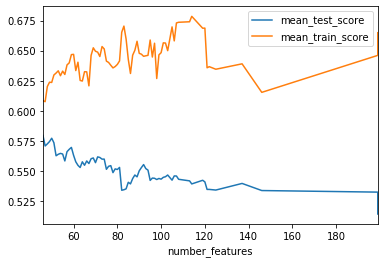

In [47]:
%matplotlib inline
scores_history.plot()


In [48]:
X_trainTD.columns

Index(['IPDAILYage_75plus_elecnonelec', 'EDDAILYattendances_deriv1_lag14',
       'IPDAILYage_mean_elecnonelec_deriv1_lag7',
       'IPDAILYpatients_nonelec_deriv2_lag14',
       'IPDAILYage_mean_elecnonelec_deriv2_lag14',
       'IPDAILYpatients_nonelec_deriv1_lag3',
       'IPDAILYpatients_nonelec_deriv2_lag1', 'EDDAILYage_75plus_deriv1_lag3',
       'EDDAILYage_75plus_deriv1_lag5', 'IPDAILYpatients_elec_deriv2_lag7',
       'EDDAILYadmissions_deriv2_lag5', 'IPDAILYpatients_total_deriv2_lag3',
       'EDMORNoccupancy', 'IPDAILYage_75plus_elecnonelec_deriv2_lag1',
       'IPMORNIPMORNpatients_total',
       'IPDAILYage_mean_elecnonelec_deriv1_lag14',
       'IPDAILYage_mean_elecnonelec_deriv1_lag5',
       'IPDAILYage_mean_elecnonelec_deriv2_lag5',
       'IPDAILYpatients_daycase_deriv1_lag30', 'EDDAILYage_75plus_deriv2_lag5',
       'IPDAILYpatients_elec_deriv2_lag3', 'IPDAILYpatients_total',
       'IPDAILYpatients_elec_deriv1_lag5', 'EDDAILYage_75plus',
       'EDDAILYadmissions_de

# finding perf on validation sets 

In [49]:
X = X_trainTD
y = y_train

In [50]:
from src.eval.eval_utils import BinClassEval

No handles with labels found to put in legend.
No handles with labels found to put in legend.


1

Model has decision_function.
Model has predict_proba.
AUC:  0.924
F1 score:  0.545
accuracy:  0.754
2

Model has decision_function.
Model has predict_proba.
AUC:  0.88
F1 score:  0.483
accuracy:  0.777
3

No handles with labels found to put in legend.
No handles with labels found to put in legend.




Model has decision_function.
Model has predict_proba.
AUC:  0.928
F1 score:  0.667
accuracy:  0.884
4

Model has decision_function.
Model has predict_proba.
AUC:  0.907
F1 score:  0.595
accuracy:  0.846
5


No handles with labels found to put in legend.



Model has decision_function.
Model has predict_proba.
AUC:  0.89
F1 score:  0.568
accuracy:  0.806


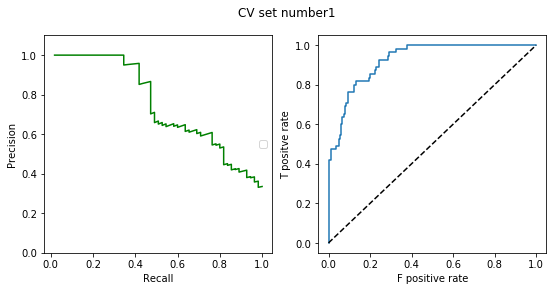

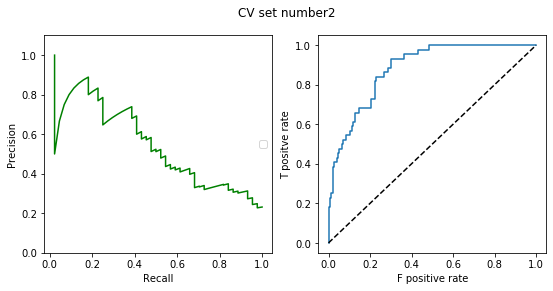

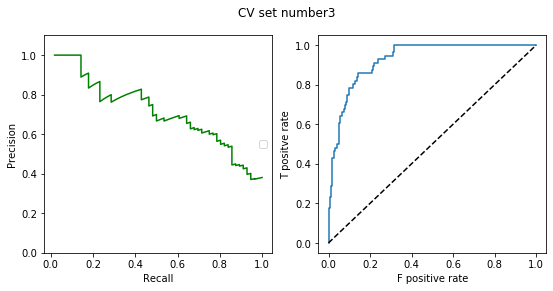

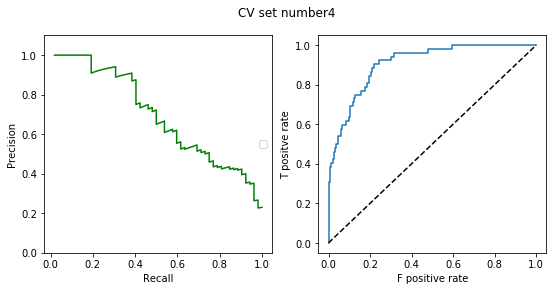

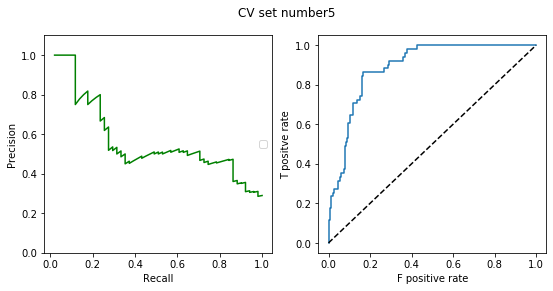

In [78]:
#### take model from earlier grid search
model = grid_search.best_estimator_

#### make cv timeseries generator
tscv = TimeSeriesSplit(n_splits=5)#.split(X_trainT)

#### loop over cv splits
loop_no = 0
for train_index, valid_index in tscv.split(X):
    loop_no += 1
    print(loop_no)
    
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]
    
    #### for this fold fit model
    model.fit(X_train, y_train)
    #### for this fold eval model
    print()
    BinClassEval(model, X_valid, y_valid, 'CV set number' + str(loop_no), plot=True)

Conclusion:
 - Issue with scores dropping off in larger data sets (i've seen this consistantly)
     - is there a problem with X features? i.e. a massive drop off in the IP values (dont think so)
     - long term trends affecting result. SO more data to train confuses things?
 - we have an issue with using f1 score to choose a model, it doesnt represent the whole curve well. We could miss a robust model this way.
 - number of folds makes a huge difference to curve
 


In [61]:
for i in X_valid.shape[0]:
    print(i)

IPDAILYage_75plus_elecnonelec
EDDAILYattendances_deriv1_lag14
IPDAILYage_mean_elecnonelec_deriv1_lag7
IPDAILYpatients_nonelec_deriv2_lag14
IPDAILYage_mean_elecnonelec_deriv2_lag14
IPDAILYpatients_nonelec_deriv1_lag3
IPDAILYpatients_nonelec_deriv2_lag1
EDDAILYage_75plus_deriv1_lag3
EDDAILYage_75plus_deriv1_lag5
IPDAILYpatients_elec_deriv2_lag7
EDDAILYadmissions_deriv2_lag5
IPDAILYpatients_total_deriv2_lag3
EDMORNoccupancy
IPDAILYage_75plus_elecnonelec_deriv2_lag1
IPMORNIPMORNpatients_total
IPDAILYage_mean_elecnonelec_deriv1_lag14
IPDAILYage_mean_elecnonelec_deriv1_lag5
IPDAILYage_mean_elecnonelec_deriv2_lag5
IPDAILYpatients_daycase_deriv1_lag30
EDDAILYage_75plus_deriv2_lag5
IPDAILYpatients_elec_deriv2_lag3
IPDAILYpatients_total
IPDAILYpatients_elec_deriv1_lag5
EDDAILYage_75plus
EDDAILYadmissions_deriv1_lag5
IPDAILYpatients_nonelec_deriv2_lag30
IPMORNIPMORNage_75plus_elecnonelec
TARGET_prevday
EDDAILYage_75plus_deriv2_lag3
IPDAILYpatients_nonelec_deriv1_lag14
IPDAILYpatients_nonelec_deri

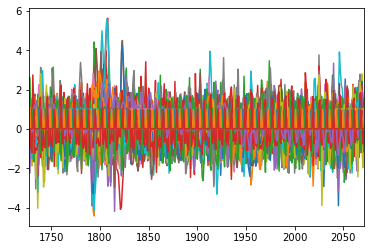

In [68]:
for col in list(X_valid.columns):
    X_valid[col].plot()

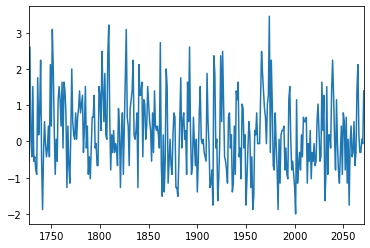

In [70]:
X_valid['EDMORNoccupancy'].plot(legend=False)

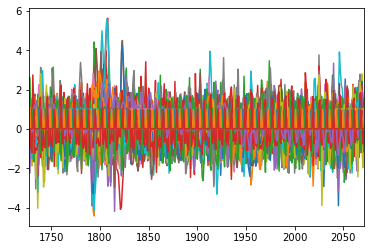

In [59]:
X_valid.plot(legend=False)

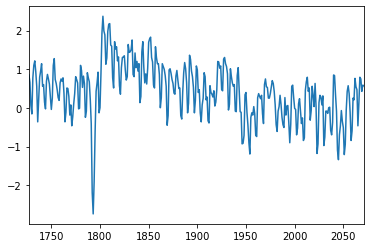

In [72]:
X_valid['IPDAILYpatients_nonelec'].plot()

In [72]:
for i in X_train.columns:
    print(i)

IPDAILYpatients_elec_deriv2_lag3
EDDAILYage_mean
TARGET_prevday_deriv1_lag1
EDDAILYage_75plus_deriv1_lag5
EDDAILYattendances_deriv1_lag7
EDDAILYadmissions_deriv1_lag1
IPDAILYage_75plus_elecnonelec_deriv2_lag3
IPDAILYage_75plus_elecnonelec_deriv2_lag14
IPMORNIPMORNpatients_total
IPDAILYpatients_nonelec_deriv1_lag14
IPDAILYpatients_daycase_deriv1_lag30
EDDAILYage_mean_deriv1_lag5
EDDAILYage_mean_deriv2_lag1
EDDAILYage_mean_deriv1_lag30
IPDAILYage_mean_elecnonelec_deriv2_lag14
TARGET_prevday_lag27
EDDAILYage_75plus_deriv1_lag2
IPDAILYpatients_nonelec_deriv1_lag7
IPDAILYpatients_daycase_deriv2_lag30
TARGET_prevday_deriv1_lag3
EDDAILYage_75plus_deriv2_lag7
IPDAILYpatients_daycase
TARGET_prevday
IPDAILYpatients_total_deriv2_lag14
IPDAILYpatients_elec_deriv1_lag14
IPDAILYage_mean_elecnonelec_deriv2_lag30
EDDAILYage_mean_deriv2_lag3
IPMORNIPMORNage_mean_elecnonelec
EDDAILYage_mean_deriv1_lag14
EDDAILYage_75plus_deriv2_lag2
IPDAILYpatients_elec_deriv1_lag30
EDDAILYattendances_deriv1_lag5
IPDAIL

In [58]:
len(X_train)

1727

In [59]:
len(y_train)

1727

In [115]:
y.shape

(1727,)

In [112]:
y_valid.iloc[1720:]

Series([], Name: flag_target, dtype: int32)

ValueError: X has 137 features per sample; expecting 146

In [54]:
break

SyntaxError: 'break' outside loop (<ipython-input-54-6aaf1f276005>, line 4)

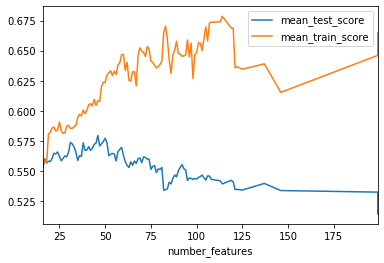

In [64]:
%matplotlib inline
scores_history.plot()


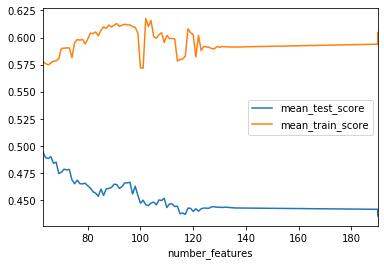

In [105]:
%matplotlib inline
scores_history.plot()


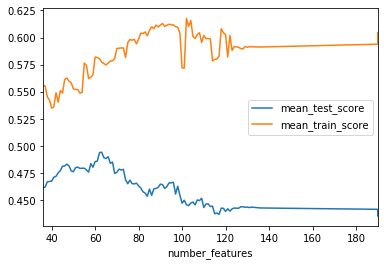

In [75]:
%matplotlib inline
scores_history.plot()


In [92]:
#### make copy o feature data
X_trainTD = X_trainT.copy()
no_features = X_trainTD.shape[1]

mean_test_score = []
mean_train_score = []
number_features = []

# for loop in np.arange(0,10):
while no_features > 35:
    number_features.append(no_features)
    grid = {
        'C':[0.05, 0.1,0.2,0.3,0.5,0.7,1],
       'penalty':['l1'] # 'l1',
    }
    
    #### train model
    grid_search = find_best_model(lgr, grid, X_trainTD, y_train, 'CV set')
    
    #### find feature importance
    data = grid_search.best_estimator_.coef_[0,:]
    cols = list(X_trainTD.columns)
    important_features = pd.DataFrame(data=data, index=cols, columns=['coef'])
    important_features['coef'] = important_features.coef.abs()
    important_features = important_features.sort_values('coef',ascending=False)
    
    #### save/print info
    no_features = X_trainTD.shape[1]
    print('No. features: ' , no_features)
    
    scores_df = (pd.DataFrame(grid_search.cv_results_).query('rank_test_score == 1')[['mean_test_score','mean_train_score']])
    
    mean_test_score.append(scores_df.mean_test_score.values[0])
    mean_train_score.append(scores_df.mean_train_score.values[0])
    
    #### find features to remove
    col_to_drop = []
#     col_to_drop = list(important_features[(important_features["coef"] < 0.001)].index)
    if len(col_to_drop) == 0:
        col_to_drop = list(important_features[-1:].index)
    
    #### remove features
    X_trainTD = X_trainTD.drop(col_to_drop,axis=1)
    

    
data = {'mean_test_score':mean_test_score, 'mean_train_score':mean_train_score, 'number_features':number_features}
scores_history = pd.DataFrame(data).set_index('number_features')
    
    
    

CV MODEL RESULTS
{'C': 0.1, 'penalty': 'l1'}
   mean_test_score  mean_train_score
1         0.450084          0.535958
No. features:  190
CV MODEL RESULTS
{'C': 0.1, 'penalty': 'l1'}
   mean_test_score  mean_train_score
1         0.450084          0.535958
No. features:  189
CV MODEL RESULTS
{'C': 0.1, 'penalty': 'l1'}
   mean_test_score  mean_train_score
1         0.450084          0.535958
No. features:  188
CV MODEL RESULTS
{'C': 0.1, 'penalty': 'l1'}
   mean_test_score  mean_train_score
1         0.450084          0.535958
No. features:  187
CV MODEL RESULTS
{'C': 0.1, 'penalty': 'l1'}
   mean_test_score  mean_train_score
1         0.450084          0.535958
No. features:  186
CV MODEL RESULTS
{'C': 0.1, 'penalty': 'l1'}
   mean_test_score  mean_train_score
1         0.450084          0.535958
No. features:  185
CV MODEL RESULTS
{'C': 0.1, 'penalty': 'l1'}
   mean_test_score  mean_train_score
1         0.450084          0.535958
No. features:  184
CV MODEL RESULTS
{'C': 0.1, 'penal

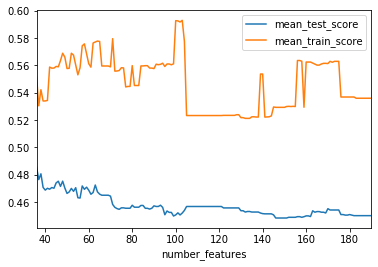

In [94]:
scores_history.plot()

In [97]:
important_features

,coef
dayofweek_Tuesday,1.474057
month_9,1.220660
TARGET_prevday,0.988190
month_6,0.501065
IPDAILYpatients_nonelec_deriv2_lag1,0.485647
IPDAILYpatients_daycase_deriv1_lag5,0.466849
IPDAILYpatients_daycase_deriv2_lag2,0.457718
month_7,0.429526
IPDAILYpatients_daycase_deriv2_lag30,0.417727
IPDAILYpatients_daycase_deriv2_lag3,0.398600


In [39]:
break

SyntaxError: 'break' outside loop (<ipython-input-39-6aaf1f276005>, line 4)

NOTE: consider creating log for preprocessing information in order for repeatability in future.

In [98]:
from src.eval.eval_utils import save_model_to_log

save_model_to_log('./../../data/output/model_log.pkl', 'D2', lgr, grid_search, 'Uses all features + derivatives from previous day. l1 pen iterated over all variables to reduce number of vars. in D2_daily_data_to_model_FULLPIPELINE_find best features.ipynb.')

Model logged.


In [106]:
from src.eval.eval_utils import save_model_to_log

save_model_to_log('./../../data/output/model_log.pkl', 'D2', lgr, grid_search, 'Uses all features + derivatives from previous day. l2 pen iterated over all variables (rm coef < 0.05 or 1) to reduce number of vars. in D2_daily_data_to_model_FULLPIPELINE_find best features.ipynb.')

Model logged.


In [54]:
from src.eval.eval_utils import save_model_to_log

save_model_to_log('./../../data/output/model_log.pkl', 'D2', rf, grid_search, 'Model uses all derivative features from previous day. in D2_daily_data_to_model_FULLPIPELINE.ipynb.')

Model logged.


In [107]:
models = pd.read_pickle('./../../data/output/model_log.pkl')
# models.drop(3,inplace=True)
models

,dataV,model,gridsearch,mean_train,mean_valid,notes
0,v1,"LogisticRegression(C=0.3, class_weight='balanc...",mean_fit_time std_fit_time mean_score_tim...,[0.629],[0.52],Initial model which was built on first edition...
1,v1,"(DecisionTreeClassifier(class_weight=None, cri...",mean_fit_time std_fit_time mean_score_ti...,[0.685],[0.419],Random Forest 1st attempt with v1.
2,v1,"XGBClassifier(base_score=0.5, booster='gbtree'...",mean_fit_time std_fit_time mean_score_tim...,[0.829],[0.439],V1 attempt with XGBOOST. KFOLD selection of fe...
3,D2,"RandomForestClassifier(bootstrap=True, class_w...",mean_fit_time std_fit_time mean_score_tim...,[0.64],[0.454],Model uses all derivative features from previo...
4,D2,"LogisticRegression(C=1.0, class_weight='balanc...",mean_fit_time std_fit_time mean_score_ti...,[0.489],[0.445],Model uses all derivative features from previo...
5,D2,"LogisticRegression(C=1.0, class_weight='balanc...",mean_fit_time std_fit_time mean_score_ti...,[0.515],[0.448],only target features from previous day + der+l...
6,D2,"LogisticRegression(C=1.0, class_weight='balanc...",mean_fit_time std_fit_time mean_score_tim...,[0.552],[0.486],Uses all features + derivatives from previous ...
7,D2,"LogisticRegression(C=1.0, class_weight='balanc...",mean_fit_time std_fit_time mean_score_tim...,[0.577],[0.494],Uses all features + derivatives from previous ...


In [52]:
models.to_pickle('./../../data/output/model_log.pkl')